# Trabalho de Inteligência Artificial I



### __Prof:__ Hitoshi Nagano, Ph.D. 

### __Aluno:__ João Roberto Perin

#### Material de apoio:  

[Pandas Dataframe by Example](http://queirozf.com/entries/pandas-dataframe-by-example)

##  
  
## Instruções:

1) __Baixar os datasets em:__  https://www.kaggle.com/c/home-credit-default-risk/data

2) __Explorar conforme instruções:__  

 * __application_train.csv:__ Esse csv possui 122 colunas: explorar 40 colunas sendo as primeiras 30 obrigatórias e 10 adicionais a escolher.  
 
 * 30 colunas obrigatórias:  

>  SK_ID_CURR  
>  TARGET  
>  NAME_CONTRACT_TYPE  
>  CODE_GENDER  
>  FLAG_OWN_CAR  
>  FLAG_OWN_REALTY  
>  CNT_CHILDREN  
>  AMT_INCOME_TOTAL  
>  AMT_CREDIT  
>  AMT_ANNUITY  
>  AMT_GOODS_PRICE  
>  NAME_TYPE_SUITE  
>  NAME_INCOME_TYPE  
>  NAME_EDUCATION_TYPE  
>  NAME_FAMILY_STATUS  
>  NAME_HOUSING_TYPE  
>  REGION_POPULATION_RELATIVE  
>  DAYS_BIRTH  
>  DAYS_EMPLOYED  
>  DAYS_REGISTRATION  
>  DAYS_ID_PUBLISH  
>  OWN_CAR_AGE  
>  FLAG_MOBIL  
>  FLAG_EMP_PHONE  
>  FLAG_WORK_PHONE  
>  FLAG_CONT_MOBILE  
>  FLAG_PHONE  
>  FLAG_EMAIL   
>  OCCUPATION_TYPE  
>  CNT_FAM_MEMBERS  
       
 * alunos deverão se organizar para que todas as colunas sejam exploradas
 * escolher dois arquivos, para exploração e join/merge/concat com o 'application_train.csv'
 
>  HomeCredit_columns_description.csv  
>  POS_CASH_balance.csv  
>  credit_card_balance.csv  
>  installments_payments.csv  
>  application_train.csv  
>  bureau.csv  
>  previous_application.csv  
>  bureau_balance.csv  
>  sample_submission.csv  

3) __objetivos:__
* entendimento do problema de negócio
* carregamento do dataset
* identificação e tratamento de NaN
* exploração univariada, bivariada
* visualizações
* insights de negócio
* formatação do dataset para algoritmos de machine learning
* criação de features: agregação de dados, junção de dois ou mais dataframes

4) __entregável:__ jupyter notebook. Não será necessário apresentação em powerpoint, nem relatório.

5) __entrega limite:__ 8/agosto/2018 

6) __trabalho individual.__ Haverá aplicação sistema anti-plágio nas submissões. (http://www.fgv.br/mailing/codigo-etica-conduta/24/)
   suspeitas de plágio estarão sujeitos a arguição oral de 5 mins por aluno no ultimo dia de aula (11/agosto/2018),

7) __avaliação:__
* jupyter notebook e arguição (se houver)

# Definição dos dados de trabalho

In [3]:
import pandas as pd

semente = 2306 # <-- Data de aniversário


df = pd.read_csv('./data/application_train.csv', index_col=0)

# Reset do indice para liberar a coluna SK_ID_CURR
df.reset_index(inplace = True)


# Pegando as 30 colunas obrigatórias
df30 = df.iloc[:,0:30]

# Pegando colunas a partir da 31 (30 pq é indice 0) para sorteio
df_temp=df.iloc[:,30:]

# Sorteio de 10 colunas com a semente Data Aniversario
df10 = df_temp.sample(10,axis=1,random_state=semente)

# Juntar todas as colunas 30 obrigatorias + 10 do sorteio
df40 = pd.concat([df30, df10], axis=1)

# Imprimir o resultado:
i = 1
for x in df40.columns:
    print(str(i) + " - " + x)
    i += 1

1 - SK_ID_CURR
2 - TARGET
3 - NAME_CONTRACT_TYPE
4 - CODE_GENDER
5 - FLAG_OWN_CAR
6 - FLAG_OWN_REALTY
7 - CNT_CHILDREN
8 - AMT_INCOME_TOTAL
9 - AMT_CREDIT
10 - AMT_ANNUITY
11 - AMT_GOODS_PRICE
12 - NAME_TYPE_SUITE
13 - NAME_INCOME_TYPE
14 - NAME_EDUCATION_TYPE
15 - NAME_FAMILY_STATUS
16 - NAME_HOUSING_TYPE
17 - REGION_POPULATION_RELATIVE
18 - DAYS_BIRTH
19 - DAYS_EMPLOYED
20 - DAYS_REGISTRATION
21 - DAYS_ID_PUBLISH
22 - OWN_CAR_AGE
23 - FLAG_MOBIL
24 - FLAG_EMP_PHONE
25 - FLAG_WORK_PHONE
26 - FLAG_CONT_MOBILE
27 - FLAG_PHONE
28 - FLAG_EMAIL
29 - OCCUPATION_TYPE
30 - CNT_FAM_MEMBERS
31 - DEF_30_CNT_SOCIAL_CIRCLE
32 - FLAG_DOCUMENT_8
33 - FLAG_DOCUMENT_3
34 - FLAG_DOCUMENT_15
35 - LIVINGAREA_MEDI
36 - EMERGENCYSTATE_MODE
37 - REGION_RATING_CLIENT_W_CITY
38 - FLOORSMIN_AVG
39 - FLAG_DOCUMENT_19
40 - ORGANIZATION_TYPE


# Carga dos Dados

In [4]:
import pandas as pd
pd.set_option('display.precision', 2)
pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)

In [5]:
df = df40

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

### Colunas que apresentam NaNs:

__Total de Registros:__  307511
> ```
> AMT_ANNUITY                    307499 non-null float64
> AMT_GOODS_PRICE                307233 non-null float64
> NAME_TYPE_SUITE                306219 non-null object
> OWN_CAR_AGE                    104582 non-null float64
> OCCUPATION_TYPE                211120 non-null object
> CNT_FAM_MEMBERS                307509 non-null float64
> DEF_30_CNT_SOCIAL_CIRCLE       306490 non-null float64
> CNT_FAM_MEMBERS                307509 non-null float64
> DEF_30_CNT_SOCIAL_CIRCLE       306490 non-null float64
> LIVINGAREA_MEDI                153161 non-null float64
> EMERGENCYSTATE_MODE            161756 non-null object
> EMERGENCYSTATE_MODE            161756 non-null object
> FLOORSMIN_AVG                   98869 non-null float64
```

In [6]:
df.shape

(307511, 40)

In [7]:
df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE         

In [35]:
df.set_index('SK_ID_CURR')

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_8,FLAG_DOCUMENT_3,FLAG_DOCUMENT_15,LIVINGAREA_MEDI,EMERGENCYSTATE_MODE,REGION_RATING_CLIENT_W_CITY,FLOORSMIN_AVG,FLAG_DOCUMENT_19,ORGANIZATION_TYPE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202.500k,406.598k,24.700k,351.000k,...,2.000,0,1,0,19.300m,No,2,125.000m,0,Business Entity Type 3
100003,0,Cash loans,F,N,N,0,270.000k,1.294M,35.698k,1.130M,...,0.000,0,1,0,55.800m,No,1,333.300m,0,School
100004,0,Revolving loans,M,Y,Y,0,67.500k,135.000k,6.750k,135.000k,...,0.000,0,0,0,NaN,NaN,2,NaN,0,Government
100006,0,Cash loans,F,N,Y,0,135.000k,312.682k,29.686k,297.000k,...,0.000,0,1,0,NaN,NaN,2,NaN,0,Business Entity Type 3
100007,0,Cash loans,M,N,Y,0,121.500k,513.000k,21.866k,513.000k,...,0.000,1,0,0,NaN,NaN,2,NaN,0,Religion
100008,0,Cash loans,M,N,Y,0,99.000k,490.496k,27.518k,454.500k,...,0.000,0,1,0,NaN,NaN,2,NaN,0,Other
100009,0,Cash loans,F,Y,Y,1,171.000k,1.561M,41.301k,1.395M,...,0.000,1,0,0,NaN,NaN,2,NaN,0,Business Entity Type 3
100010,0,Cash loans,M,Y,Y,0,360.000k,1.530M,42.075k,1.530M,...,0.000,0,1,0,NaN,NaN,3,NaN,0,Other
100011,0,Cash loans,F,N,Y,0,112.500k,1.020M,33.826k,913.500k,...,0.000,0,1,0,NaN,NaN,2,NaN,0,XNA


## Entendendo os dados

In [69]:
# Vendo os conteúdos de cada coluna:
for x in df.columns:
    print(df[[x]].sample(10))
    print('------------------------------------------------')

        SK_ID_CURR
82388       195551
15981       118649
217326      351804
5261        106152
8057        109395
264081      405799
120292      239482
284437      429403
39856       146164
16136       118820
------------------------------------------------
        TARGET
202454       0
94723        0
238757       0
216529       0
168297       0
177931       0
192258       0
129232       0
273025       0
221384       0
------------------------------------------------
       NAME_CONTRACT_TYPE
127174         Cash loans
247406         Cash loans
202680         Cash loans
27937          Cash loans
171650         Cash loans
222129         Cash loans
194470         Cash loans
275758         Cash loans
201815    Revolving loans
134565         Cash loans
------------------------------------------------
       CODE_GENDER
8521             F
265199           F
218982           M
130736           M
130932           F
204032           F
159253           M
173917           F
305198           M
151

       OCCUPATION_TYPE
228189             NaN
163301        Managers
81263   Medicine staff
90743      Sales staff
121916        Laborers
75280              NaN
131261     Sales staff
66633              NaN
279838         Drivers
176999             NaN
------------------------------------------------
        CNT_FAM_MEMBERS
92898             2.000
246996            4.000
303490            1.000
170396            3.000
281389            3.000
181302            1.000
261370            2.000
270793            4.000
266866            2.000
79371             2.000
------------------------------------------------
        DEF_30_CNT_SOCIAL_CIRCLE
241241                     0.000
170544                     0.000
109019                     0.000
92265                      0.000
118162                     0.000
120168                     0.000
219655                     0.000
80032                      0.000
115058                     0.000
276878                     0.000
----------------------

In [97]:
for x in df.columns:
    print ("------------------------------------------------------------------------------")
    print (x)
    print ("----------")
    #print (type(df[x]))
    #print (df[x].value_counts())
    
    print(df[x].unique())

------------------------------------------------------------------------------
SK_ID_CURR
----------
[100002 100003 100004 ... 456253 456254 456255]
------------------------------------------------------------------------------
TARGET
----------
[1 0]
------------------------------------------------------------------------------
NAME_CONTRACT_TYPE
----------
['Cash loans' 'Revolving loans']
------------------------------------------------------------------------------
CODE_GENDER
----------
['M' 'F' 'XNA']
------------------------------------------------------------------------------
FLAG_OWN_CAR
----------
['N' 'Y']
------------------------------------------------------------------------------
FLAG_OWN_REALTY
----------
['Y' 'N']
------------------------------------------------------------------------------
CNT_CHILDREN
----------
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
------------------------------------------------------------------------------
AMT_INCOME_TOTAL
----------
[2

In [98]:
# df.describe()

## Como estão os NaN dentro da amostra

In [102]:
import matplotlib.pyplot as plt

%matplotlib inline

In [130]:
# df_isnull = df.apply(lambda x: (1 if sum(x.isnull()) > 0 else 0), axis=0 )

In [131]:
# print(df_isnull)

## Selecionar apenas as colunas com NaN

In [194]:
null_cols = df.columns[df.isnull().any()]
null_cols

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'LIVINGAREA_MEDI', 'EMERGENCYSTATE_MODE', 'FLOORSMIN_AVG'],
      dtype='object')

In [195]:
null_count = df[null_cols].isnull().sum()
null_count

AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
OWN_CAR_AGE                 202929
OCCUPATION_TYPE              96391
CNT_FAM_MEMBERS                  2
DEF_30_CNT_SOCIAL_CIRCLE      1021
LIVINGAREA_MEDI             154350
EMERGENCYSTATE_MODE         145755
FLOORSMIN_AVG               208642
dtype: int64

### Mostrando as variáveis com NaN de forma mais visual

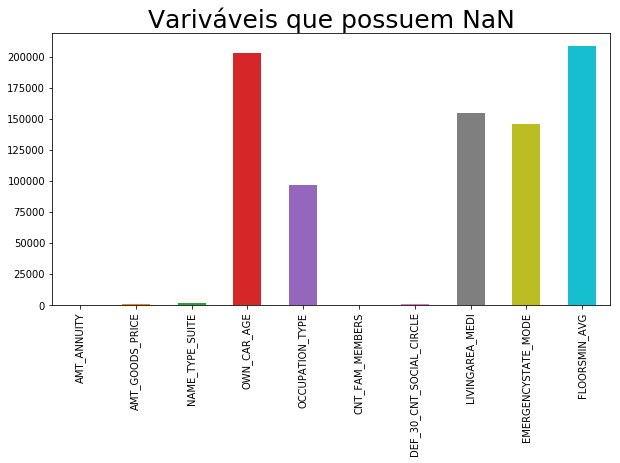

In [196]:
plt.figure()

null_count.plot(
    kind = 'bar',
    figsize = (10,5),
    fontsize = '10',
    
)
#plt.grid(True)
plt.title("Variváveis que possuem NaN", fontsize = 25)
#plt.rc('grid', linestyle="-.", color="lightgray")

#plt.legend(loc='best')
plt.show()


In [113]:
# df_nulls = df.apply(lambda x: (sum(x.isnull()) / 307511),axis=0)


plt.figure()

df_nulls.plot(
    kind = 'bar',
    figsize = (10,5),
    fontsize = '10',
    style='k--',
    
)
plt.grid(True)
plt.title("Quantidade de NaN por Variável", fontsize = 25)
plt.rc('grid', linestyle="-.", color="lightgray")

#plt.legend(loc='best')
plt.show()
